In [3]:
import pandas as pd    # for data manipulation and analysis
import numpy as np     # for numerical computations
import matplotlib.pyplot as plt   # for visualizing the data
import seaborn as sns  # for enhanced data visualization

In [4]:
df = pd.read_csv("Zomato data .csv")

In [12]:
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [14]:
print(df.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


In [15]:
print(df.describe())

             rate        votes  approx_cost(for two people)
count  148.000000   148.000000                   148.000000
mean     3.633108   264.810811                   418.243243
std      0.402271   653.676951                   223.085098
min      2.600000     0.000000                   100.000000
25%      3.300000     6.750000                   200.000000
50%      3.700000    43.500000                   400.000000
75%      3.900000   221.750000                   600.000000
max      4.600000  4884.000000                   950.000000


In [19]:
df['rate'] = df['rate'].astype(str) 
df['rate'] = df['rate'].replace('NEW', np.nan) 
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+|\d+)') 
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '', regex=False)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


In [21]:
df_cleaned = df.dropna(subset=['rate', 'votes', 'approx_cost(for two people)'])
df_cleaned = df_cleaned.drop_duplicates()

In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


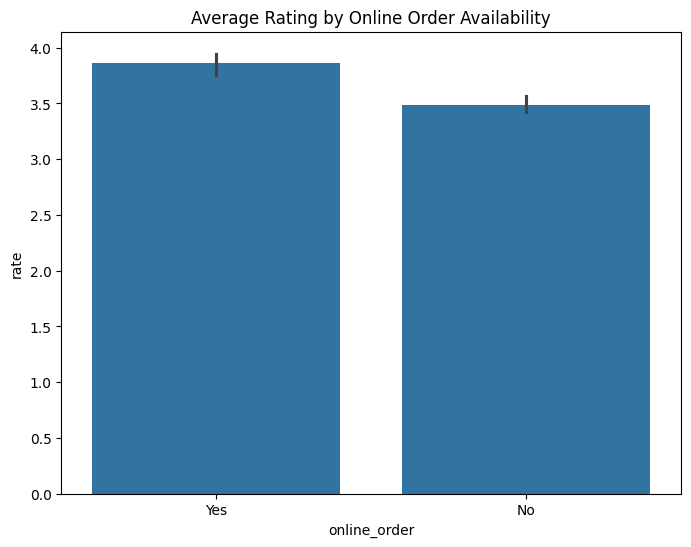

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='online_order', y='rate', data=df_cleaned)
plt.title('Average Rating by Online Order Availability')
plt.show()

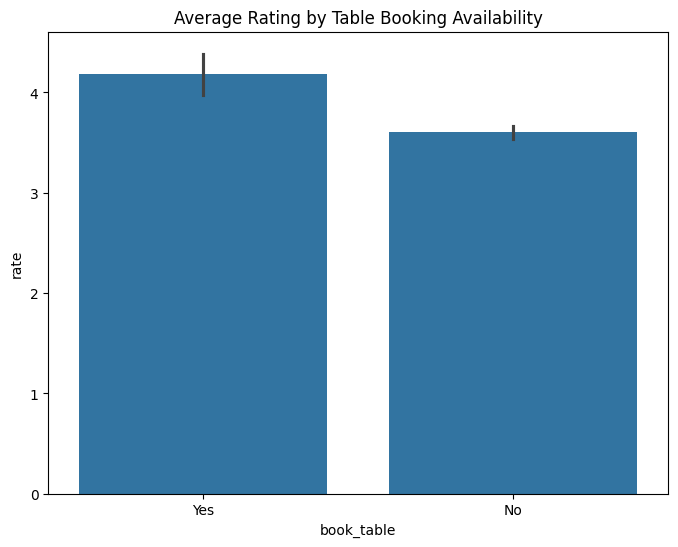

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x='book_table', y='rate', data=df_cleaned)
plt.title('Average Rating by Table Booking Availability')
plt.show()

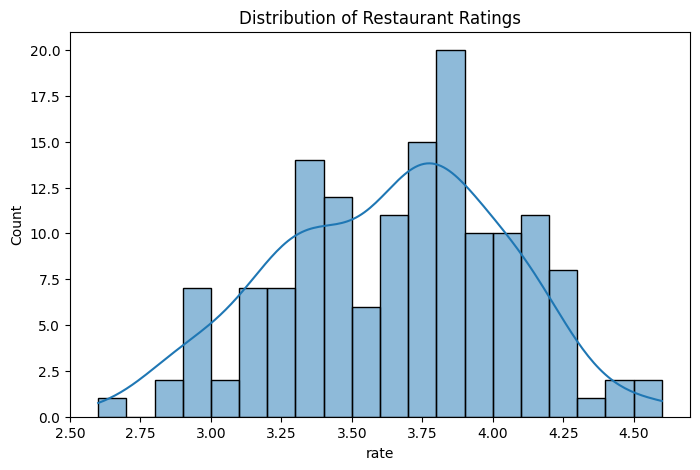

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['rate'], kde=True, bins=20)
plt.title('Distribution of Restaurant Ratings')
plt.show()

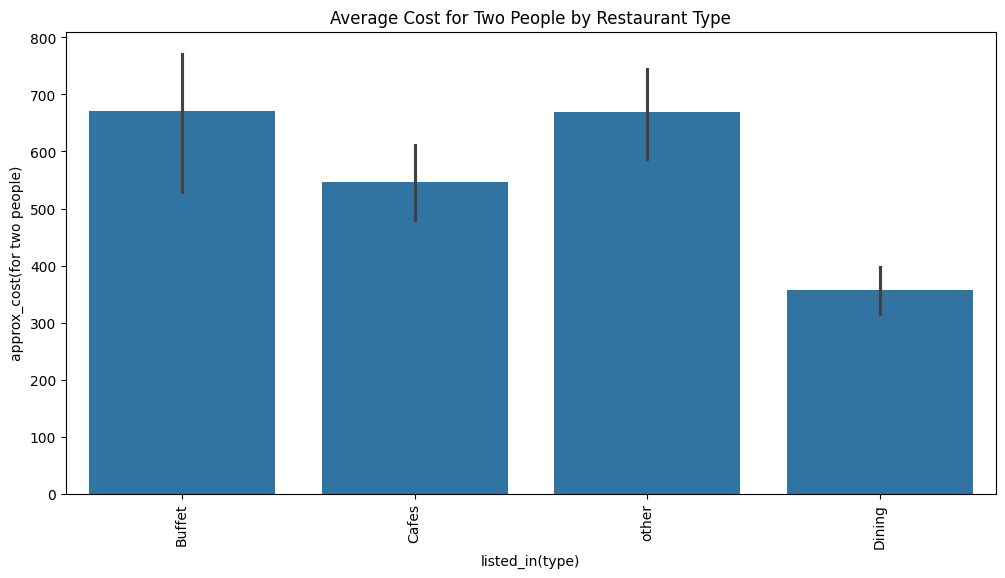

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='listed_in(type)', y='approx_cost(for two people)', data=df_cleaned)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Average Cost for Two People by Restaurant Type')
plt.show()